# Tools

In [1]:
import os, sys

In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
%matplotlib notebook

In [4]:
import waveprop, imp
imp.reload(waveprop)

<module 'waveprop' from '/home/97n/dv/sts/cupi2d/waveprop.py'>

# Grating parameters

In [5]:
grPeriod = 7.97e-6
np_gr = 64 # number of points within the grating period

npoints = 2**12
Lx = npoints*grPeriod/np_gr
print('Lx = {:.3f} um'.format(Lx*1e6))
print('npoints period = {:d}'.format(np_gr))
print('npoints total = {:d}'.format(npoints))
print('grating lateral size = {:.2f} um'.format(grPeriod*np_gr*1e6))

Lx = 510.080 um
npoints period = 64
npoints total = 4096
grating lateral size = 510.08 um


3.35 AA

In [6]:
wavelength = 3.35e-10

In [35]:
zt = (grPeriod/2)**2/wavelength/2
X = np.linspace(-Lx/2, Lx/2, npoints)

tabloid distance

In [36]:
zt

0.023701828358208953

# Beam 1 Plane wave

In [8]:
sigma_x = 1e-3
emSource = ((1j)*X*0.0 +1.0)*np.exp(-X**2/sigma_x**2)
sourceStr = 'planeWave'

<IPython.core.display.Javascript object>


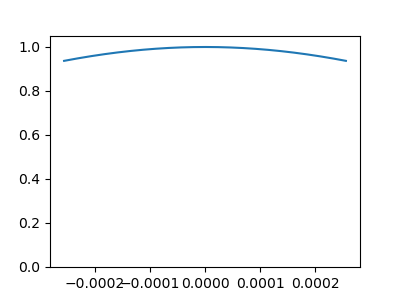

(0.0, 1.05)

In [9]:
fig = plt.figure(figsize=(4,3))
plt.plot(X, np.abs(emSource))
plt.ylim(0, 1.05)

# Grating

In [10]:
Nrows = npoints//np_gr
gr0 = np.zeros((Nrows, np_gr))
gr0[:, :np_gr//2] = 1
gr0.shape = -1,

In [11]:
marginx = (npoints - gr0.shape[0])//2
gr0 = np.pad(gr0, ((marginx, marginx),), mode='constant', constant_values=(1,))
gr0 = np.pad(gr0, ((0, npoints - gr0.shape[0]),), mode='constant', constant_values=(1,))
gr0.shape

(4096,)

In [12]:
#plt.figure()
#plt.plot(gr0)

In [13]:
gr = np.exp(-1j*np.pi*gr0) # Pi phase grating
#gr = np.exp(-1j*np.pi/2*gr0) # Pi/2 phase grating

# Propagation

In [14]:
waveprop.fresnelNumber(grPeriod, 6., wavelength, verbose=True)

Nf = 0.031602
Conditions:
Nf << 1 Fraunhofer regime;
Nf >> 1 Geometric Optic;
Nf -> 1 Fresnel Difraction.


0.03160243781094527

In [15]:
d_sample_gr = 6.4

In [16]:
%%time
em_b4_gr = waveprop.propTF_RayleighSommerfeld_1D(emSource, Lx, wavelength, d_sample_gr)

CPU times: user 1.47 ms, sys: 0 ns, total: 1.47 ms
Wall time: 898 µs


In [17]:
after_grating = em_b4_gr * gr

<IPython.core.display.Javascript object>


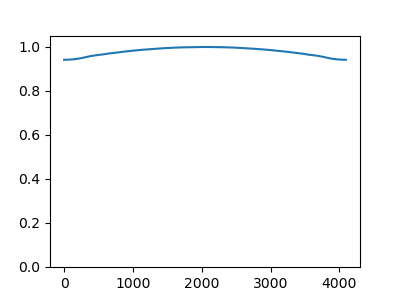

(0.0, 1.05)

In [18]:
plt.figure(figsize=(4,3))
plt.plot(np.abs(after_grating))
plt.ylim(0, 1.05)

In [19]:
d12 = 2.379e-2

In [20]:
waveprop.fresnelNumber(grPeriod, d12, wavelength, verbose=True)

Nf = 7.9704
Conditions:
Nf << 1 Fraunhofer regime;
Nf >> 1 Geometric Optic;
Nf -> 1 Fresnel Difraction.


7.970350015370813

In [21]:
%%time
u2_x = waveprop.propTF_RayleighSommerfeld_1D(after_grating,Lx,wavelength,d12)

CPU times: user 1.69 ms, sys: 0 ns, total: 1.69 ms
Wall time: 1.11 ms


In [22]:
npoints

4096

<IPython.core.display.Javascript object>


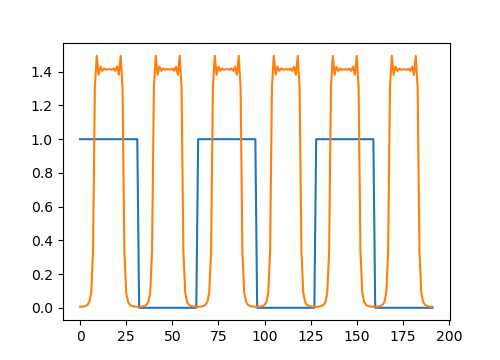

In [23]:
plt.figure(figsize=(5,3.6))
sl = slice(npoints//2, npoints//2+np_gr*3)
plt.plot(gr0[sl])
plt.plot(np.abs(u2_x)[sl])

# Loop over z

In [25]:
d12*2

0.04758

In [24]:
zt

0.047403656716417907

In [26]:
N = 800
field = np.zeros((N, npoints), dtype='complex')
zs = np.linspace(0, 4*zt, N)
for iz, z in enumerate(zs):
    field[iz] = waveprop.propTF_RayleighSommerfeld_1D(after_grating,Lx,wavelength,z)

In [27]:
zs.shape, X.shape, field.shape

((800,), (4096,), (800, 4096))

In [37]:
zg, xg = np.meshgrid(zs/zt, X)

In [38]:
zg.shape

(4096, 800)

<IPython.core.display.Javascript object>


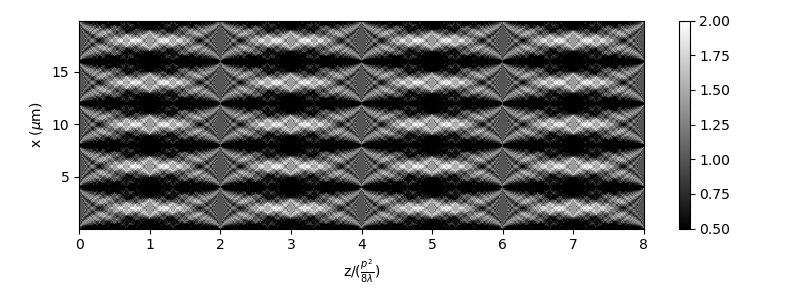

<ipython-input-49-007d88298ec8>:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(zg[sl], xg[sl]*1e6, np.abs(field).T[sl], cmap='gray')


In [49]:
plt.figure(figsize=(8,3))
sl = slice(2048,2048+int(64/2*5)), slice(None, None)
plt.pcolormesh(zg[sl], xg[sl]*1e6, np.abs(field).T[sl], cmap='gray')
plt.colorbar()
plt.clim(.5, 2)
plt.xlabel(r'z/($\frac{p^2}{8\lambda}$)')
plt.ylabel('x ($\mu$m)')
plt.tight_layout()